In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/Users/gimli/projects/igre


In [94]:
import scipy.io
import matplotlib.pyplot as plt
import cv2
import numpy as np
from src.models.ig import information_gain as ig
import imageio

In [3]:
data = scipy.io.loadmat('/Users/gimli/ownCloud/leonardo/allChannels.mat')["l"] / 255.0
factor = 6

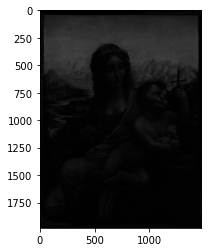

In [4]:
plt.imshow(data[:,:,2], cmap='gray')
plt.show()

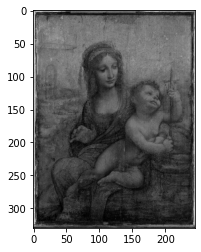

In [5]:
plt.imshow(cv2.resize(data[:,:,25], (int(data.shape[1]/factor), int(data.shape[0]/factor))), cmap='gray')
plt.show()

In [100]:
small = cv2.resize(data[:,:,25], 
                   (int(data.shape[1]/factor), int(data.shape[0]/factor)),
                   interpolation=cv2.INTER_AREA
                  )
big = cv2.resize(small, (data.shape[1], data.shape[0]))

In [101]:
inBands=16
in_small = np.zeros((int(data.shape[0]/factor), int(data.shape[1]/factor), inBands))
for i in range(inBands):
    in_small[:,:,i] = cv2.resize(data[:,:,i], 
                                 (int(data.shape[1]/factor), int(data.shape[0]/factor)),
                                interpolation=cv2.INTER_AREA)

In [8]:
help(ig)

Help on function information_gain in module src.models.ig:

information_gain(visible, target, layers=None, training_set_size: int = 25000)
    Compute information gain of the target for visible. Usage:
    
        infGain, extrapolation, model = informationGain(visible, target, ...)
    
    Transform function for transformation of visible to target will be trained by
    FF-ANN. By this neural network extrapolation is computed.  Finally, information
    gain is computed as difference between target and extrapolation.  'visible' and
    'target' must have same dimensions (width, height).
    
    Mandatory arguments:
        visible = 3-dimensional array of VIS pixel intensities in form (height,
            width, modalities)
        target  = 3-dimensional array of NIR pixel intensities in form (height,
            width, modalities)
    
    Optional parameters:
        layers = array of layer widths
        training_set_size = number of samples used for training, if 'None' is passe

In [102]:
diff, approx, net = ig(in_small, small, layers=[30,30,30], training_set_size=50000)

Selecting 50000 samples randomly for use by algorithm.
Adding input layer, width = 16
Adding dense layer, width = 30
Adding dense layer, width = 30
Adding dense layer, width = 30
Adding dense layer, width = 1
Compiling model took 0.1531's.
Train on 40000 samples, validate on 10000 samples
Epoch 1/300
40000/40000 [==============================] - 3s 71us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 2/300
40000/40000 [==============================] - 2s 60us/sample - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 3/300
40000/40000 [==============================] - 2s 59us/sample - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 4/300
40000/40000 [==============================] - 3s 73us/sample - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 5/300
40000/40000 [=====

40000/40000 [==============================] - 2s 52us/sample - loss: 9.3377e-04 - mean_squared_error: 9.3376e-04 - val_loss: 9.2521e-04 - val_mean_squared_error: 9.2521e-04
Epoch 47/300
40000/40000 [==============================] - 2s 55us/sample - loss: 9.3459e-04 - mean_squared_error: 9.3459e-04 - val_loss: 9.1127e-04 - val_mean_squared_error: 9.1127e-04
Epoch 48/300
40000/40000 [==============================] - 2s 57us/sample - loss: 9.1755e-04 - mean_squared_error: 9.1755e-04 - val_loss: 9.0833e-04 - val_mean_squared_error: 9.0833e-04
Epoch 49/300
40000/40000 [==============================] - 2s 61us/sample - loss: 9.2688e-04 - mean_squared_error: 9.2688e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 50/300
40000/40000 [==============================] - 2s 57us/sample - loss: 9.1572e-04 - mean_squared_error: 9.1572e-04 - val_loss: 9.7204e-04 - val_mean_squared_error: 9.7204e-04
Epoch 51/300
40000/40000 [==============================] - 2s 60us/sample - loss: 9.2

40000/40000 [==============================] - 2s 51us/sample - loss: 8.0791e-04 - mean_squared_error: 8.0791e-04 - val_loss: 7.9092e-04 - val_mean_squared_error: 7.9092e-04
Epoch 91/300
40000/40000 [==============================] - 2s 58us/sample - loss: 8.1479e-04 - mean_squared_error: 8.1479e-04 - val_loss: 8.3434e-04 - val_mean_squared_error: 8.3434e-04
Epoch 92/300
40000/40000 [==============================] - 3s 66us/sample - loss: 8.1619e-04 - mean_squared_error: 8.1619e-04 - val_loss: 7.8508e-04 - val_mean_squared_error: 7.8508e-04
Epoch 93/300
40000/40000 [==============================] - 2s 57us/sample - loss: 8.0473e-04 - mean_squared_error: 8.0473e-04 - val_loss: 7.8398e-04 - val_mean_squared_error: 7.8398e-04
Epoch 94/300
40000/40000 [==============================] - 2s 57us/sample - loss: 8.0386e-04 - mean_squared_error: 8.0387e-04 - val_loss: 8.0349e-04 - val_mean_squared_error: 8.0349e-04ean_squared_error
Epoch 95/300
40000/40000 [==============================] - 4

40000/40000 [==============================] - 3s 63us/sample - loss: 7.5039e-04 - mean_squared_error: 7.5039e-04 - val_loss: 8.2259e-04 - val_mean_squared_error: 8.2259e-04
Epoch 134/300
40000/40000 [==============================] - 3s 68us/sample - loss: 7.3834e-04 - mean_squared_error: 7.3834e-04 - val_loss: 7.8272e-04 - val_mean_squared_error: 7.8272e-04
Epoch 135/300
40000/40000 [==============================] - 3s 70us/sample - loss: 7.4063e-04 - mean_squared_error: 7.4063e-04 - val_loss: 7.2065e-04 - val_mean_squared_error: 7.2065e-04
Epoch 136/300
40000/40000 [==============================] - 3s 70us/sample - loss: 7.4476e-04 - mean_squared_error: 7.4476e-04 - val_loss: 7.3065e-04 - val_mean_squared_error: 7.3065e-04
Epoch 137/300
40000/40000 [==============================] - 3s 67us/sample - loss: 7.3543e-04 - mean_squared_error: 7.3543e-04 - val_loss: 7.5091e-04 - val_mean_squared_error: 7.5091e-04
Epoch 138/300
40000/40000 [==============================] - 2s 61us/sampl

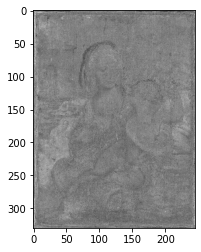

In [10]:
plt.imshow(diff[:,:,0], cmap='gray')
plt.show()

In [11]:
expected = net.predict(data[:,:,:16].reshape(data.shape[0] * data.shape[1], inBands)).reshape(data.shape[0], data.shape[1])

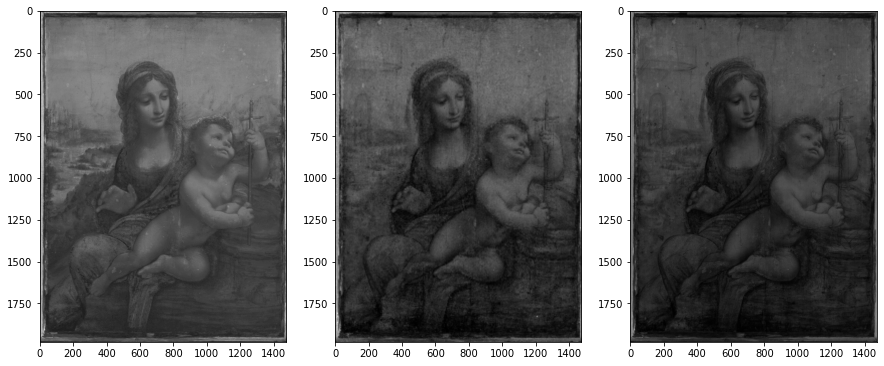

In [12]:
plt.figure(figsize=(15,15))
ax = plt.subplot(1,3,1)
ax.imshow(expected, cmap='gray')
ax = plt.subplot(1,3,2)
ax.imshow(big, cmap='gray')
ax = plt.subplot(1,3,3)
ax.imshow(data[:,:,25], cmap='gray')
plt.show()

In [13]:
diff_big = cv2.resize(diff, (data.shape[1], data.shape[0]))

In [14]:
upscaled = expected + diff_big

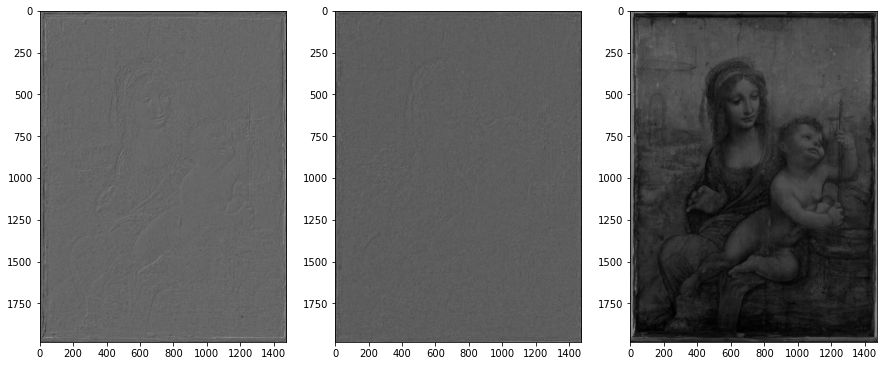

In [15]:
plt.figure(figsize=(15,15))
ax = plt.subplot(1,3,1)
ax.imshow(data[:,:,25] - big, cmap="gray")
ax = plt.subplot(1,3,2)
# ax.imshow(data[:,:,25] - upscaled, cmap="gray")
ax = plt.subplot(1,3,3)
ax.imshow(data[:,:,25], cmap='gray')
plt.show()

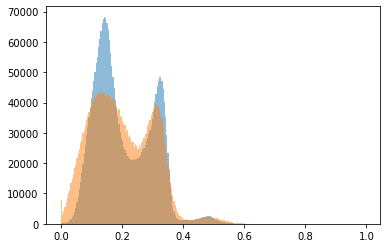

In [16]:
plt.hist(expected.reshape(-1), bins=np.arange(0,1,1/255), alpha=0.5)
plt.hist(data[:,:,25].reshape(-1), bins=np.arange(0,1,1/255), alpha=0.5)
plt.show()

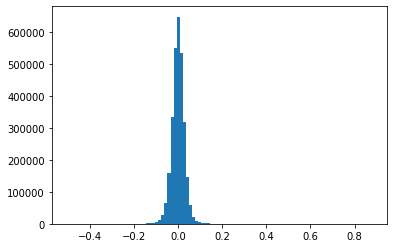

In [17]:
plt.hist((data[:,:,25] - upscaled).reshape(-1), bins=100)
plt.show()

In [18]:
np.mean(expected.reshape(-1))

0.20675322

In [19]:
np.mean(data[:,:,25].reshape(-1))

0.19882159995091578

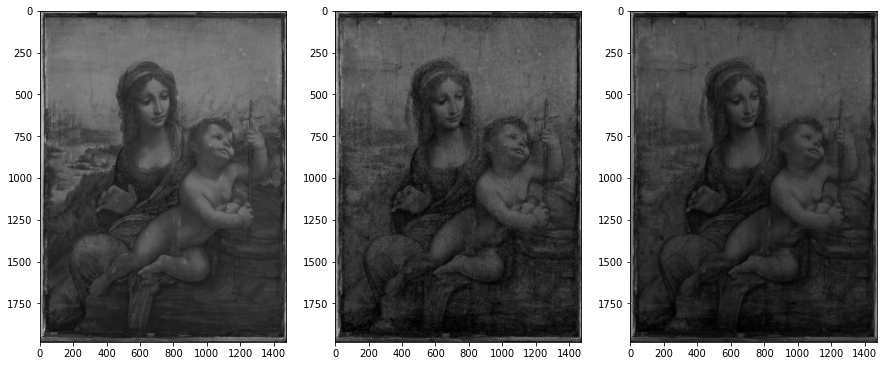

In [20]:
plt.figure(figsize=(15,15))
ax = plt.subplot(1,3,1)
ax.imshow(np.clip(expected,0,1), cmap="gray")
ax = plt.subplot(1,3,2)
ax.imshow(np.clip(upscaled,0,1), cmap="gray")
ax = plt.subplot(1,3,3)
ax.imshow(data[:,:,25], cmap='gray')
plt.show()

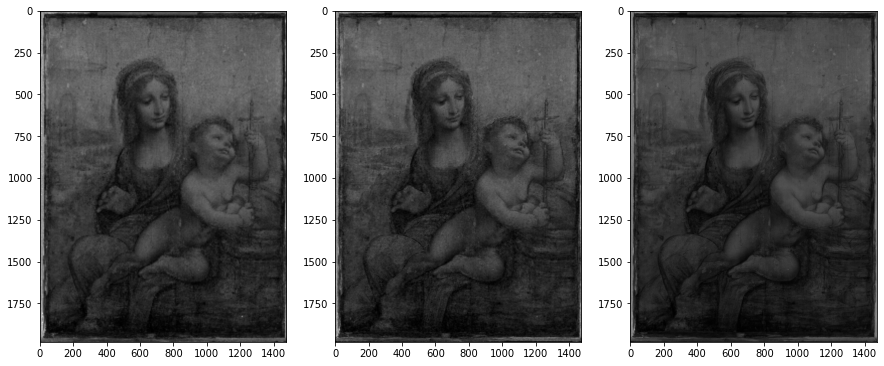

In [21]:
plt.figure(figsize=(15,15))
ax = plt.subplot(1,3,1)
ax.imshow(np.clip(big,0,1), cmap="gray")
ax = plt.subplot(1,3,2)
ax.imshow(np.clip(upscaled,0,1), cmap="gray")
ax = plt.subplot(1,3,3)
ax.imshow(data[:,:,25], cmap='gray')
plt.show()

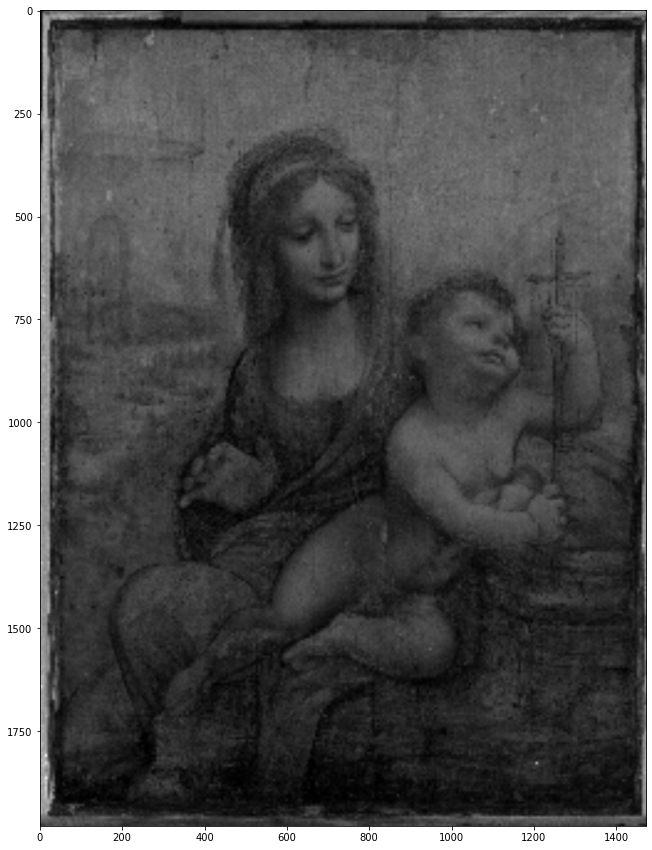

In [22]:
plt.figure(figsize=(20,15))
plt.imshow(np.clip(big,0,1), cmap="gray")
plt.show()

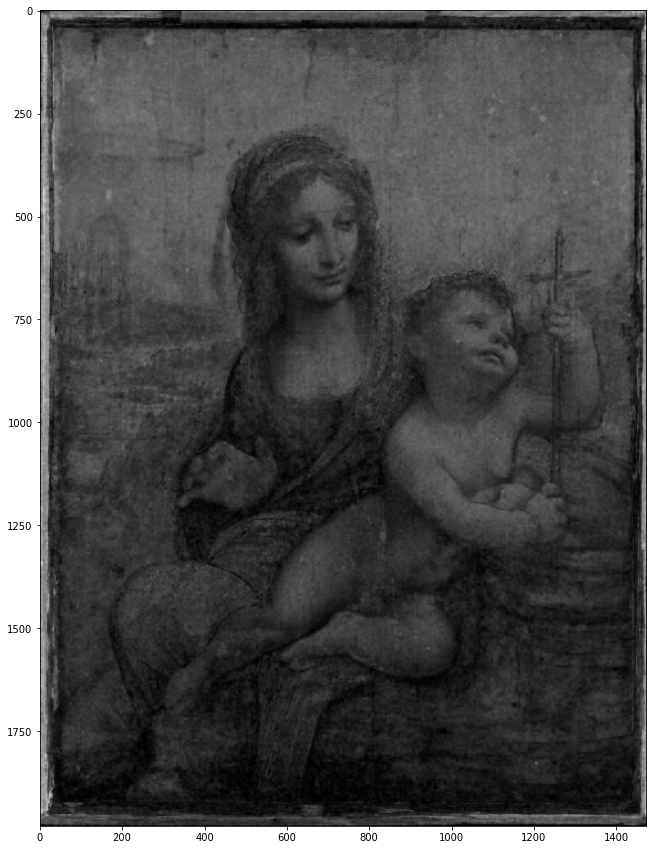

In [23]:
plt.figure(figsize=(20,15))
plt.imshow(np.clip(upscaled,0,1), cmap="gray")
plt.show()

In [24]:
np.median(np.power(upscaled-data[:,:,25],2))

0.0002764513916562796

In [25]:
np.median(np.power(big-data[:,:,25],2))

0.0002874137165368568

In [26]:
np.median(np.power((big + upscaled)/2-data[:,:,25],2))

0.0002305132928398034

In [27]:
np.median(np.power(cv2.resize(small, (data.shape[1], data.shape[0])) - data[:,:,25], 2))

0.0002874137165368568

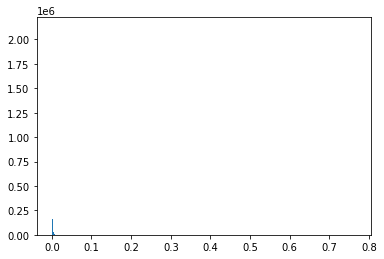

In [29]:
plt.hist(np.power(upscaled-data[:,:,25],2).reshape(-1), bins=1000)
plt.show()

In [98]:
imageio.imwrite("/Users/gimli/Downloads/upscaled.tiff", upscaled)

In [99]:
imageio.imwrite("/Users/gimli/Downloads/big.tiff", big)
imageio.imwrite("/Users/gimli/Downloads/original.tiff", data[:,:,25])

In [59]:
def gs(vectors):
    basis = []
    weights = []
    for v in vectors:
        w = v - np.sum( np.dot(v,b)*b  for b in basis )
        if (w > 1e-10).any():  
            basis.append(w/np.linalg.norm(w))
            weights.append(w)
    return np.array(basis), np.array(weights)

In [86]:
in_gram, W = gs(
    np.concatenate([in_small[:,:,:16],small.reshape(small.shape[0], small.shape[1],1)], 2
            ).reshape(-1,17).T)

/Users/gimli/.pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


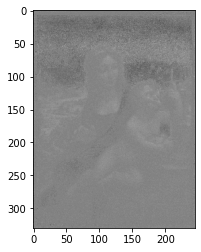

In [89]:
plt.imshow(W.T.reshape(small.shape[0], small.shape[1], 17)[:,:,3], cmap='gray')
plt.show()

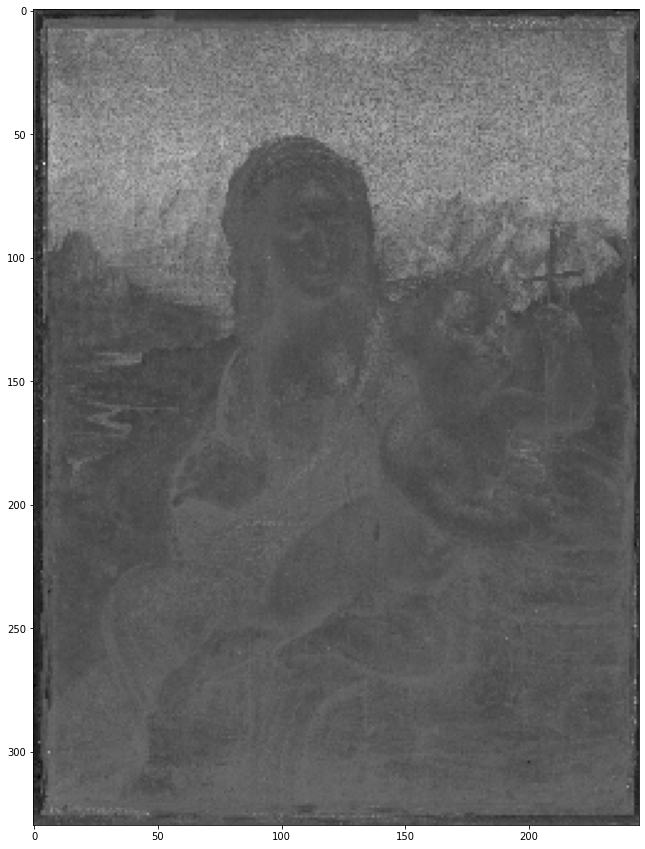

In [79]:
plt.figure(figsize=(15,15))
plt.imshow(in_gram.T.reshape(small.shape[0], small.shape[1], 17)[:,:,1], cmap="gray")
plt.show()

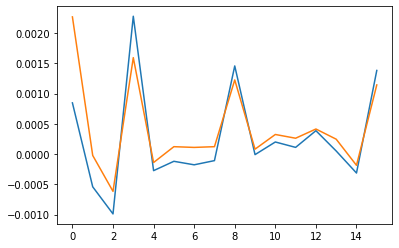

In [58]:
plt.plot([np.median(band) for band in in_gram])
plt.plot([np.mean(band) for band in in_gram])